# The Numbers of Music:
### A Short History of Music, as told by the Billboard Hot 100

Music has been an integral part of world cultures for thousands of years. Styles and songs have come and gone, but the concept of rating music has been a relatively new concept. Since the late 1950s, Billboard has been tracking the popularity of songs....

## TODO: Finish this intro!

## Data Description

Our data was taken from the Billboard Top 100 website using the billboard.py API which can be found [here](https://github.com/guoguo12/billboard-charts). Using the API, we were able to get every Billboard Top 100 chart from mid-1958 until February 2018. Once all of these charts were retrieved, we extracted them into .json files using the merge_json.py script which can be found in our github repository [here](https://github.com/COGS108/Pr_089/blob/master/merge_json.py).We then cleaned the data and extrapolated trends, specifically, the rise and fall of the number one positions of popular artists and songs from the Billboard dataset. 




## Data Cleaning and Pre-Processing 

 
As mentioned earlier, our data was grabbed from the Billboard Hot 100. There were two methods of doing this. One method was to download full HTML pages and use BeautifulSoup to parse and extract the Hot 100, and the other was to use the billboard.py API. Since dealing with raw HTML is quite rough, we opted to go with the API.

Though the API was a lot more convenient, it brought up the issue of not giving us a file to use. To combat this, we wrote the script `save_chart_as_json.py`, which downloads all of the charts, adds them to a huge dict, then serializes that dict into a .json file.

We ran into a couple issues with this script. Firstly, for some unknown reason, the program wouldn’t download every single chart and would cut off at a specific date. To combat this, the script was modified to save that first section into a .json file, then to start again from where it left off and save the rest of the data into a second .json file.

Now, we had to merge and verify the .json files. For this, two scripts were written: `merge_json.py` and `print_json.py`. The former took the two .json files and merged them into a file called full_data.json. The latter could be used to print out the .json files in a more legible format than one would get from simply using a command like `cat`, `more`, or `less`.

Finally, we could start to clean our data. Luckily, since Billboard keeps their records essentially immaculate, there wasn’t too much to do here. Firstly, we read in the data into a DataFrame, but found that the formatting that was easiest for serializing was the worst for usage. Each song entry was a list with 5 entries, and a full chart took up a row, giving us 3,108 rows and 100 columns. A more optimal DataFrame for usage would have each song take up a row and each attribute be a column (giving 7 columns). Before doing that, we had to deal with NaN values; only 126 individual entries out of 310,800 songs were NaN, so for those we did simple replacement to fill them in with -1 (since -1 is a value that won’t naturally occur in the charts).

Next up was extraction. To accomplish this, a code block populates lists with one containing numbers 1-100 (for re-numbering), 1-3,108 for keeping the current valid chart week, then lists with all of the Song Names, peak positions, last positions, artist, and number of weeks on the chart. This reshaped our DataFrame from being 3,108 rows by 100 columns to being 310,800 rows by 7 columns, and with this DataFrame we were able to do all of our analysis.

### Imports

In [1]:
# Imports for the project

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sys import stdout as std

### Pre-Processing

The data for this project was grabbed from the Billboard Hot-100 chart using an API called "billboard.py" found [here](https://github.com/guoguo12/billboard-charts)

The downloaded charts were extracted into .json files and merged into a full .json file using the Python scripts found in the project directory on GitHub.

In [2]:
# Read in the data into DataFrames to start our analysis


df2 = pd.read_json('./full_data.json')

In [3]:
# Now, let's sort this data to get it formatted where each row is a full chart and each entry is a
# list of attributes relating to the song at that position


sort_mod_df = df2.reindex_axis(sorted(df2.columns), axis=1)

# Let's examine the dataframe
sort_mod_df.head()


,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,"[God's Plan, Drake, 1, 1, 4]","[Perfect, Ed Sheeran, 1, 2, 25]","[Finesse, Bruno Mars & Cardi B, 3, 3, 7]","[Havana, Camila Cabello Featuring Young Thug, ...","[Rockstar, Post Malone Featuring 21 Savage, 1,...","[Look Alive, BlocBoy JB Featuring Drake, 6, 0, 1]","[Meant To Be, Bebe Rexha & Florida Georgia Lin...","[New Rules, Dua Lipa, 6, 6, 29]","[All The Stars, Kendrick Lamar & SZA, 9, 31, 6]","[Stir Fry, Migos, 8, 8, 8]",...,"[Black Panther, Kendrick Lamar, 91, 0, 1]","[At The Club, Jacquees X Dej Loaf, 92, 92, 2]","[Codeine Dreaming, Kodak Black Featuring Lil W...","[The Long Way, Brett Eldredge, 93, 93, 2]","[Rock, Plies, 95, 99, 3]","[I Like Me Better, Lauv, 96, 0, 1]","[When We, Tank, 86, 0, 7]","[Criminal, Natti Natasha x Ozuna, 95, 95, 3]","[IDGAF, Dua Lipa, 88, 88, 5]","[Rewrite The Stars, Zac Efron & Zendaya, 70, 8..."
1,"[God's Plan, Drake, 1, 1, 3]","[Perfect, Ed Sheeran, 1, 2, 24]","[Finesse, Bruno Mars & Cardi B, 3, 3, 6]","[Havana, Camila Cabello Featuring Young Thug, ...","[Rockstar, Post Malone Featuring 21 Savage, 1,...","[New Rules, Dua Lipa, 6, 7, 28]","[Pray For Me, The Weeknd & Kendrick Lamar, 7, ...","[Stir Fry, Migos, 8, 12, 7]","[Meant To Be, Bebe Rexha & Florida Georgia Lin...","[Bad At Love, Halsey, 5, 6, 23]",...,"[Mayores, Becky G Featuring Bad Bunny, 74, 95,...","[At The Club, Jacquees X Dej Loaf, 92, 0, 1]","[The Long Way, Brett Eldredge, 93, 0, 1]","[Singles You Up, Jordan Davis, 94, 0, 1]","[Criminal, Natti Natasha x Ozuna, 95, 0, 2]","[Corazon, Maluma X Nego do Borel, 87, 100, 6]","[Sick Boy, The Chainsmokers, 65, 90, 3]","[A Girl Like You, Easton Corbin, 98, 0, 1]","[Rock, Plies, 99, 0, 2]","[Supplies, Justin Timberlake, 71, 0, 2]"
2,"[God's Plan, Drake, 1, 1, 2]","[Perfect, Ed Sheeran, 1, 2, 23]","[Finesse, Bruno Mars & Cardi B, 3, 5, 5]","[Havana, Camila Cabello Featuring Young Thug, ...","[Rockstar, Post Malone Featuring 21 Savage, 1,...","[Bad At Love, Halsey, 5, 6, 22]","[New Rules, Dua Lipa, 7, 8, 27]","[MotorSport, Migos, Nicki Minaj & Cardi B, 6, ...","[Say Something, Justin Timberlake Featuring Ch...","[Thunder, Imagine Dragons, 4, 9, 40]",...,"[Rubbin Off The Paint, YBN Nahmir, 46, 69, 13]","[El Farsante, Ozuna & Romeo Santos, 92, 0, 1]","[IDGAF, Dua Lipa, 92, 92, 3]","[Most People Are Good, Luke Bryan, 94, 0, 1]","[Mayores, Becky G Featuring Bad Bunny, 74, 94,...","[CC, Migos Featuring Gucci Mane, 96, 0, 1]","[Best Friend, Sofi Tukker Featuring NERVO, The...","[MIC Drop, BTS Featuring Desiigner, 28, 84, 10]","[King's Dead, Jay Rock, Kendrick Lamar, Future...","[Corazon, Maluma X Nego do Borel, 87, 93, 5]"
3,"[God's Plan, Drake, 1, 0, 1]","[Perfect, Ed Sheeran, 1, 2, 22]","[Havana, Camila Cabello Featuring Young Thug, ...","[Rockstar, Post Malone Featuring 21 Savage, 1,...","[Finesse, Bruno Mars & Cardi B, 3, 4, 4]","[Bad At Love, Halsey, 5, 5, 21]","[Diplomatic Immunity, Drake, 7, 0, 1]","[New Rules, Dua Lipa, 8, 8, 26]","[Thunder, Imagine Dragons, 4, 6, 39]","[No Limit, G-Eazy Featuring A$AP Rocky & Cardi...",...,"[Beautiful Trauma, P!nk, 91, 99, 5]","[IDGAF, Dua Lipa, 92, 92, 2]","[Corazon, Maluma X Nego do Borel, 87, 87, 4]","[Mayores, Becky G Featuring Bad Bunny, 74, 93,...","[The Greatest Show, Hugh Jackman, Keala Settle...","[Never Enough, Loren Allred, 88, 97, 4]","[My Dawg, Lil Baby, 71, 90, 7]","[I'll Name The Dogs, Blake Shelton, 56, 82, 20]","[Rock, Plies, 99, 0, 1]","[Female, Keith Urban, 69, 100, 5]"
4,"[Havana, Camila Cabello Featuring Young Thug, ...","[Perfect, Ed Sheeran, 1, 1, 21]","[Rockstar, Post Malone Featuring 21 Savage, 1,...","[Finesse, Bruno Mars & Cardi B, 3, 3, 3]","[Bad At Love, Halsey, 5, 7, 20]","[Thunder, Imagine Dragons, 4, 6, 38]","[No Limit, G-Eazy Featuring A$AP Rocky & Cardi...","[New Rules, Dua Lipa, 8, 11, 25]","[Too Good At Goodbyes, Sam Smith, 4, 8, 19]","[MotorSport, Migos, Nicki Minaj & Cardi B, 6, ...",...,"[King's Dead, Jay Rock, Kendrick Lamar, Future...","[IDGAF, Dua Lipa, 92

### Cleanup Part 1 - Getting the Dataframe

We have our song data! Now to extract and clean it up a bit. Though the above format makes it pretty easy to track a particular song over the chart, we also want to separate each attribute so that we can grab particular portions of our data more easily.

To do this, we'll want to change the columns to represent a specific attribute of the chart. Currently, each chart takes up a full row where each columns is the particular rank of a song in that chart, but we're going to change the shape so that there will be 6 columns instead of 100, with 310,800 rows instead of 3,108.

In [4]:
# Save the current chart week numbers in a list for restoration later

SongWeeks = []
curr_pos = []
for num in range(len(sort_mod_df)):
    
    SongWeeks.append(num)
    
for num in range(1, 101):
    curr_pos.append(num)

In [5]:
# Let's now see how many entries are blank in our data
n_nan = sort_mod_df.isnull().sum()
n_nan = sum(n_nan)
print(n_nan)

126


In [6]:
# Replae NaN entries with a default value
sort_mod_df.fillna(-1, inplace=True)

In [7]:
# Verify that blank entries are gone
n_nan = sort_mod_df.isnull().sum()
n_nan = sum(n_nan)
print(n_nan)

0


### Cleanup Part 2 - Getting Lists of Data from the Dataframe

Blank data would have been a problem to deal with, so we've replaced any blank entry in our previous dataframe with the number -1. This will make it easy to identify where the missing entries are.

The next section separates out each entry of the DataFrame, organizing it into lists. Then, those lists are turned into Pandas Series objects and combined into a cleaned out DataFrame with the desired shape.

In [8]:
# Next, put all of the song attributes into separate lists to use as columns

# Create the lists
SongName = []
Artist = []
PeakPos = []
LastPos = []
NumWeeks = []

# Iterate through the entire dataframe
for index, series in sort_mod_df.iterrows():
    
    # Grab particular entries from the current row
    for entry in series:
        
        # Handle case of missing data
        if entry == -1:
            nm = entry
            NumWeeks.append(nm)
            LastPos.append(nm)
            PeakPos.append(nm)
            Artist.append(nm)
            SongName.append(nm)
        else:
            for i in range(0, 5):
                nm = entry.pop()
                if i == 0:
                    NumWeeks.append(nm)
                elif i == 1:
                    LastPos.append(nm)
                elif i == 2:
                    PeakPos.append(nm)
                elif i == 3:
                    Artist.append(nm)
                elif i == 4:
                    SongName.append(nm)

In [9]:
# Delete the copy dataframe. It's all empty now, anyway
try:
    del sort_mod_df
except(NameError):
    pass

# Now, let's build a nicely cleaned dataframe

# Use a list comprehension to extend out our SongWeeks list
new_SongWeeks = [item for item in SongWeeks for i in range(100)]

# Use a list comprehension to extend the 1-100 list
new_currPos = [num for i in range(len(SongWeeks)) for num in curr_pos]

# Make our empty DataFrame
sep_df = pd.DataFrame()

# Make each list into a series
col0 = pd.Series(data=new_SongWeeks)
col1 = pd.Series(data=SongName)
col2 = pd.Series(data=Artist)
col3 = pd.Series(data=PeakPos)
col4 = pd.Series(data=LastPos)
col5 = pd.Series(data=NumWeeks)
col6 = pd.Series(data=new_currPos)

# Add each series to the DataFrame
sep_df['Week of Chart'] = col0.values
sep_df['Current Position'] = col6.values
sep_df['Song Name'] = col1.values
sep_df['Artist'] = col2.values
sep_df['Peak Position'] = col3.values
sep_df['Last Position'] = col4.values
sep_df['Number of Weeks'] = col5.values


# Examine our new DataFrame
print(sep_df.shape)
sep_df.head(10)

(310800, 7)


,Week of Chart,Current Position,Song Name,Artist,Peak Position,Last Position,Number of Weeks
0,0,1,God's Plan,Drake,1,1,4
1,0,2,Perfect,Ed Sheeran,1,2,25
2,0,3,Finesse,Bruno Mars & Cardi B,3,3,7
3,0,4,Havana,Camila Cabello Featuring Young Thug,1,4,27
4,0,5,Rockstar,Post Malone Featuring 21 Savage,1,5,22
5,0,6,Look Alive,BlocBoy JB Featuring Drake,6,0,1
6,0,7,Meant To Be,Bebe Rexha & Florida Georgia Line,7,9,17
7,0,8,New Rules,Dua Lipa,6,6,29
8,0,9,All The Stars,Kendrick Lamar & SZA,9,31,6
9,0,10,Stir Fry,Migos,8,8,8


### Cleanup Part 3 - Creating a Cleaner Dataframe and Beginning Analysis

In this new DataFrame, the "Week of Chart" column refers to how many weeks prior to 24 February 2018 that particular chart is, with 24 February 2018 being the date of the first chart we downloaded. Therefore, ***the older the chart, the larger the number.***

Now that we have our nicely sorted and cleaned data, let's start analyzing it to see what trends and patterns we can find.

First, let's check out staying power. Often, people use the amount of time on the charts as a measurement of how good a song is. The better the song, the more weeks it is able to hold a chart spot. However, this is only part of the story; a song that holds spot No. 76 is unlikely to garner as much attention as the top 10 or top 5 songs. So, let's compare all of the songs that have reached the top 5 and see who has been there the longest

In [10]:
# Separate out all the songs that reached the top 5 (All songs with 5 or less in their peak position column)

top_df = sep_df.loc[(sep_df['Peak Position'] <= 5) & (sep_df['Peak Position'] != -1)]
top_df.head(10)

,Week of Chart,Current Position,Song Name,Artist,Peak Position,Last Position,Number of Weeks
0,0,1,God's Plan,Drake,1,1,4
1,0,2,Perfect,Ed Sheeran,1,2,25
2,0,3,Finesse,Bruno Mars & Cardi B,3,3,7
3,0,4,Havana,Camila Cabello Featuring Young Thug,1,4,27
4,0,5,Rockstar,Post Malone Featuring 21 Savage,1,5,22
14,0,15,Thunder,Imagine Dragons,4,11,42
15,0,16,Bad At Love,Halsey,5,10,24
19,0,20,No Limit,G-Eazy Featuring A$AP Rocky & Cardi B,4,16,23
23,0,24,Shape Of You,Ed Sheeran,1,23,58
24,0,25,Bodak Yellow (Money Moves),Cardi B,1,19,33


So, ignoring the very first chart (3107) and the most recent one we downloaded (0), which song has the most amount of time spent on the hot 100?

In [11]:
top_df.loc[top_df['Number of Weeks'].idxmax()]

Week of Chart                   199
Current Position                 49
Song Name               Radioactive
Artist              Imagine Dragons
Peak Position                     3
Last Position                    48
Number of Weeks                  87
Name: 19948, dtype: object

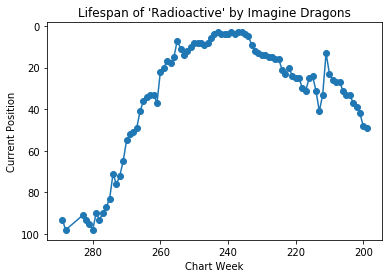

In [12]:
# First, let's grab the relevant data
rdact = sep_df.loc[(sep_df['Song Name'] == "Radioactive") & (sep_df['Artist'] == 'Imagine Dragons')]

# Now, graph the data with the Current Position on the Y axis and the Week of Chart on the X axis
x = rdact['Week of Chart']
y = rdact['Current Position']
plt.plot(x, y, '-o')

# Label the axes
plt.xlabel('Chart Week')
plt.ylabel('Current Position')

# Add a title
plt.title("Lifespan of 'Radioactive' by Imagine Dragons")

# We're inverting the axes for a more intuitive feel. This way, the passage of time
# goes left to right, and the more popular the song, the higher it is on the graph
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

## Data Analysis and Results Part 1

Looks like our winner is "Radioactive" by Imagine Dragons, with a whopping ***87 straight weeks*** spent on the Billboard Hot 100. This record was reached 199 weeks ago from 24 February 2018, or approximately the date 9 May 2014. The song initially debuted on 18 August 2012 and was on the chart until that date.

blah blah blah blah


.... now let's look at the artists that appear the *most* on the charts.

In [13]:
%%time

# Create a dict of values where key = artist name, value = number of appearances
most = {}

# Iterate through our dataframe
for index, series in sep_df.iterrows():
    
    # Grab name of artist for the current row
    curr = series['Artist']
    
    # If the artist isn't already in the dict, add them
    if curr not in most.keys():
        
        most[curr] = 1
    
    # They are there, so increment their number
    else:
        
        num = most.get(curr)
        num += 1
        most[curr] = num
        

Now, let's look at a graph of the top 10 artists with the most appearances on the charts

### **NOTE**: Do not run the cell directly below this one more than one time per instance of the current kernel! Doing so will cause errors with the output!

In [14]:
# Create lists to store relevant top 10 data
top10_songs = []
top10_artists = []

# Grab the top 10, in order from 1-10
for num in range(10):

    max_value = max(most.keys(), key=lambda k: most[k])
    top10_artists.append(max_value)
    top10_songs.append(most.get(max_value))
    del most[max_value]
    

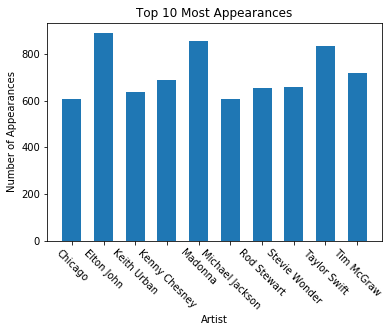

In [15]:
# Plot the top 10
plt.bar(top10_artists, top10_songs, width=0.6)

plt.xlabel('Artist')
plt.xticks(rotation=-45)
plt.ylabel('Number of Appearances')
plt.title("Top 10 Most Appearances")
plt.show()

## Data Analysis and Results Part 2

Lorem ipsum dulum....

In [16]:
"""
Takes in the user inputted artist name and returns a DataFrame of all of the
number 1 hits for that artist

Params: artist: The artist name to search for
Return: A DataFrame of number 1 hits for an artist, cleaned up. If artist
has no number 1 hits, an empty DataFrame is returned
"""
def find_no_1s(artist, option):
    
    # Determine if user wants to grab from just the number 1 songs or all of the songs
    if option == True:
        number1s = sep_df.loc[(sep_df['Peak Position'] == 1) & (sep_df['Artist'] == artist)]
    else:
        number1s = sep_df.loc[sep_df['Artist'] == artist]

    
    number1s.drop_duplicates(['Song Name'], keep='last', inplace=True)
    number1s.reset_index(inplace=True)
    return number1s

"""
Takes in a name of a song and an artist name, creates a DataFrame for that artist/song pair,
builds a graph of that relationship, then returns that graph for plotting.

Params: artist: The artist name to search for
        songname: The song title to search for
Return: A graph of the lifespan of the given song
"""
def display_results(songname, artist):
    
    # First, let's grab the relevant data
    rdact = sep_df.loc[(sep_df['Song Name'] == songname) & (sep_df['Artist'] == artist)]

    # Now, graph the data with the Current Position on the Y axis and the Week of Chart on the X axis
    x = rdact['Week of Chart']
    y = rdact['Current Position']
    plt.plot(x, y, '-o')
    
    # Add labels and a title
    plt.xlabel('Chart Week')
    title_string = "Lifespan of '" + songname + "' by " + artist
    plt.title(title_string)
    plt.ylabel('Current Position')
    
    # Invert axes for same reason as abovee
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    
    return plt

Select if you want to search only number 1 hits (T), or all hits (F): T
Please enter an artist to search for (including 'Featuring' if you want features). Type 'Q' to quit: Chicago



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Your artist's No. 1 hits are: 
0                Look Away
1    Hard To Say I'm Sorry
2      If You Leave Me Now
Name: Song Name, dtype: object
Please type the name of a song from the list below to search for: Look Away


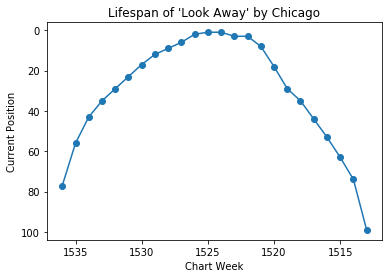

Select if you want to search only number 1 hits (T), or all hits (F): T
Please enter an artist to search for (including 'Featuring' if you want features). Type 'Q' to quit: Elton John

Your artist's No. 1 hits are: 
0    Candle In The Wind 1997/Something About The Wa...
1                                          Island Girl
2                        Lucy In The Sky With Diamonds
3                                  Bennie And The Jets
4                                       Crocodile Rock
Name: Song Name, dtype: object
Please type the name of a song from the list below to search for: Bennie And The Jets


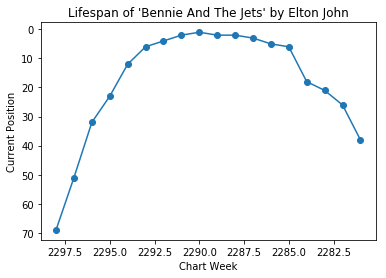

Select if you want to search only number 1 hits (T), or all hits (F): F
Please enter an artist to search for (including 'Featuring' if you want features). Type 'Q' to quit: Kanye West

Your artist's No. 1 hits are: 
0                              Fade
1                            Famous
2     Father Stretch My Hands Pt. 1
3                             Pt. 2
4                   Ultralight Beam
5                             Waves
6                               FML
7                      Real Friends
8                          Feedback
9                           Bound 2
10                       New Slaves
11                   Black Skinhead
12              Blood On The Leaves
13                All Of The Lights
14                            POWER
15                        Heartless
16                    Love Lockdown
17                         Stronger
18            Can't Tell Me Nothing
19       Diamonds From Sierra Leone
20                      Jesus Walks
21                 Through T

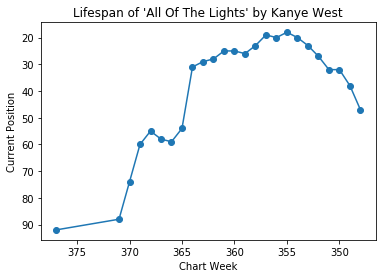

Select if you want to search only number 1 hits (T), or all hits (F): q


In [24]:
# Create an interactive graph plotting section where users can see the lifespan of different songs
# using the above functions.

try:
    
    while True:
        
        option = False
         # Let user decide if they want to search just number 1 options, or all options
        usr_input = input("Select if you want to search only number 1 hits (T), or all hits (F): ")
    
        if usr_input.upper() == 'T':
        
            option = True
        elif usr_input.upper() == 'F':
            option = False
        else:
            raise KeyboardInterrupt
    
        
        # Output the prompt and grab the user's input
        std.write("Please enter an artist to search for (including 'Featuring' if you want features). ")
        std.write('Type \'Q\' to quit: ')
        to_search = input()
        print()
    
        # Verify that they don't want to end the program
        if to_search.upper() == 'Q':
            raise KeyboardInterrupt
        
        # Call function to get the dataframe
        result = find_no_1s(to_search, option)
        
        # Make sure the dataframe has entries
        try:
            
            if(len(result) == 0):
                
                raise EOFError
        
        # Handle case of user entering an artist not on the charts
        except(EOFError):
            
            print("ERROR: artist entered with no hits")
            continue
            
        # Report matches to the user
        if option == True:
            print("Your artist's No. 1 hits are: \n%s" % repr(result['Song Name']))
        else:
            print("Your artit's chart hits are: \n%s" % repr(result['Song Name']))
            
        # Grab the song name
        item = input("Please type the name of a song from the list below to search for: ")
        
        exists = False
        try:
            
            # Iterate through the returned dataframe
            for ind, ser in result.iterrows():
            
                if item == ser['Song Name']:
                    exists = True
            
            # Make sure the user's entered song actually is a valid entry
            if exists == False:
                raise AssertionError
        
        # Handle case of user entering a song that is not a No. 1 Hit
        except(AssertionError):
            print("Song name '%s' not valid, try again" % item)
            continue
        
        # Call function to get the graph
        graph = display_results(item, to_search)
        
        # Display the graph to the user
        graph.show()
    
# Handle case of user typing 'q' to quit
except(KeyboardInterrupt):
    pass

## Data Analysis and Results Part 3

Lorem ipsum dulum dolor....

## Privacy/Ethics Considerations

In terms of privacy, our data is taken from a publicly available source [here] (billboard.com) and so there were not too many considerations for us to take in this aspect. One thing to consider is that our data might not be entirely objective. Billboard has their own internal methods of classifying and ranking songs on their Top 100 chart which have not been made known to the public. Due to the secrecy behind their methods it is difficult to know the validity of their rankings. However, taking into account widespread media acknowledgement and the overall reputation of Billboard, we can see that each Top 100 chart is reflective of the general music trends for each of their respective weeks. 

## Conclusions and Discussion

Lorem ipsum dulum sin dolor...